In [42]:
### v1.2

### Emojifier-V1: Using Baseline model 

In [43]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt
from test_utils import *

%matplotlib inline

In [4]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tesss.csv')

# X_train and X_test are arrays of strings.
# Y_train and Y_test are arrays of labels and these labels range from 0 to 4
# Training set consists of 132 examples and test set consists of 56 examples

In [46]:
print(X_train[1])
print(len(X_train))
print(len(X_test))

I am proud of your achievements
132
56


In [5]:
maxLen = len(max(X_train, key=lambda x: len(x.split())).split())

# In the above line of code, we find out the sentence with maximum number of words and store it's length in maxLen

In [48]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))
    
# The function 'label_to_emoji' converts the 'label'into the respective 'emoji'.

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


In [49]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

# 'convert_to_one_hot' function converts each label of Y_train into one-hot vector with 5 classes

In [78]:
print(Y_oh_train.shape)

(132, 5)


In [50]:
idx = 50
print(f"Sentence '{X_train[idx]}' has label index {Y_train[idx]}, which is emoji {label_to_emoji(Y_train[idx])}", )
print(f"Label index {Y_train[idx]} in one-hot encoding format is {Y_oh_train[idx]}")

Sentence 'I missed you' has label index 0, which is emoji ❤️
Label index 0 in one-hot encoding format is [1. 0. 0. 0. 0.]


In [51]:
# Importing the pre-trained 50-dimensional GloVe embeddings

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

# word_to_index - A dictionary which maps words to their respective indices in the vocabulary
# index_to_word - A dictionary which maps indices to words in the vocabulary
# word_to_vec_map - A dictionary which maps words to their respective GloVe embedding vectors

In [52]:
# Example usage of 'word_to_index' and 'index_to_word' mapping

word = "cucumber"
idx = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(idx) + "th word in the vocabulary is", index_to_word[idx])

the index of cucumber in the vocabulary is 113317
the 289846th word in the vocabulary is potatos


In [11]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: sentence_to_avg

def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (J,), where J can be any number
    """
    # Getting any valid word from the word_to_vec_map 
    any_word = list(word_to_vec_map.keys())[0]
    
    # Splitting the sentence into list of lower case words
    words = sentence.lower().split()

    # Initializing the 'avg' word vector. It should have the same shape as any GloVe embedding vector
    avg = np.zeros(word_to_vec_map[any_word].shape)
    
    # Initialize count to 0
    count = 0
    
    # Averaging the word vectors
    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
            count +=1
    
    # Getting the 'avg' only if 'count' is greater than 0. Otherwise 'avg' is None      
    if count > 0:
        avg = avg/count
    
    return avg

In [12]:
### YOU CANNOT EDIT THIS CELL

# BEGIN UNIT TEST
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = \n", avg)

def sentence_to_avg_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    avg = target("a a_nw c_w a_s", word_to_vec_map)
    assert tuple(avg.shape) == tuple(word_to_vec_map['a'].shape),  "Check the shape of your avg array"  
    assert np.allclose(avg, [1.25, 2.5]),  "Check that you are finding the 4 words"
    avg = target("love a a_nw c_w a_s", word_to_vec_map)
    assert np.allclose(avg, [1.25, 2.5]), "Divide by count, not len(words)"
    avg = target("love", word_to_vec_map)
    assert np.array_equal(avg, [0, 0]), "Average of no words must give an array of zeros"
    avg = target("c_se foo a a_nw c_w a_s deeplearning c_nw", word_to_vec_map)
    assert np.allclose(avg, [0.1666667, 2.0]), "Debug the last example"
    
    print("\033[92mAll tests passed!")
    
sentence_to_avg_test(sentence_to_avg)

# END UNIT TEST

avg = 
 [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]
All tests passed!


In [57]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: model

def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    """
    Model to train word vector representations in numpy.
    
    Arguments:
    X -- input data, numpy array of sentences as strings, of shape (m,)
    Y -- labels, numpy array of integers between 0 and 7, numpy-array of shape (m, 1)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    learning_rate -- learning_rate for the stochastic gradient descent algorithm
    num_iterations -- number of iterations
    
    Returns:
    pred -- vector of predictions, numpy-array of shape (m, 1)
    W -- weight matrix of the softmax layer, of shape (n_y, n_h)
    b -- bias of the softmax layer, of shape (n_y,)
    """
    
    # Getting any valid word from the word_to_vec_map  
    any_word = list(word_to_vec_map.keys())[0]
        
    # Number of training examples
    m = Y.shape[0]  
    # number of classes  
    n_y = len(np.unique(Y))
    # dimensions of the GloVe vectors 
    n_h = word_to_vec_map[any_word].shape[0]
    
    # Now we initialize the parameters using Xavier initialization
    # np.random.randn() gives a normal distribution with mean = 0 and variance = 1. When we multiply it by 1/ np.sqrt(n_h), the
    # resultant is a normal distribution with mean = 0 and variance = 1 /n_h which is Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # We convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    
    # Optimization loop
    # We loop over the number of iterations
    for t in range(num_iterations): 
        
        # We loop over the training examples
        for i in range(m): 
            
            # We average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # We forward propagate the avg through the softmax layer. 
            z = np.dot(W, avg)
            a = softmax(z)

            # The cost is calculated
            cost = -np.sum(np.log(a) * Y_oh[i])
            ### END CODE HERE ###
            
            # We compute the gradients.(For derivation, see the image in the below cell)
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz # Actually db = np.sum(dz, axis = 1) but since we are considering only 1 training example, db = dz

            # We update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
            
        assert type(cost) == np.float64, "Incorrect implementation of cost"
        assert cost.shape == (), "Incorrect implementation of cost"
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py

    return pred, W, b

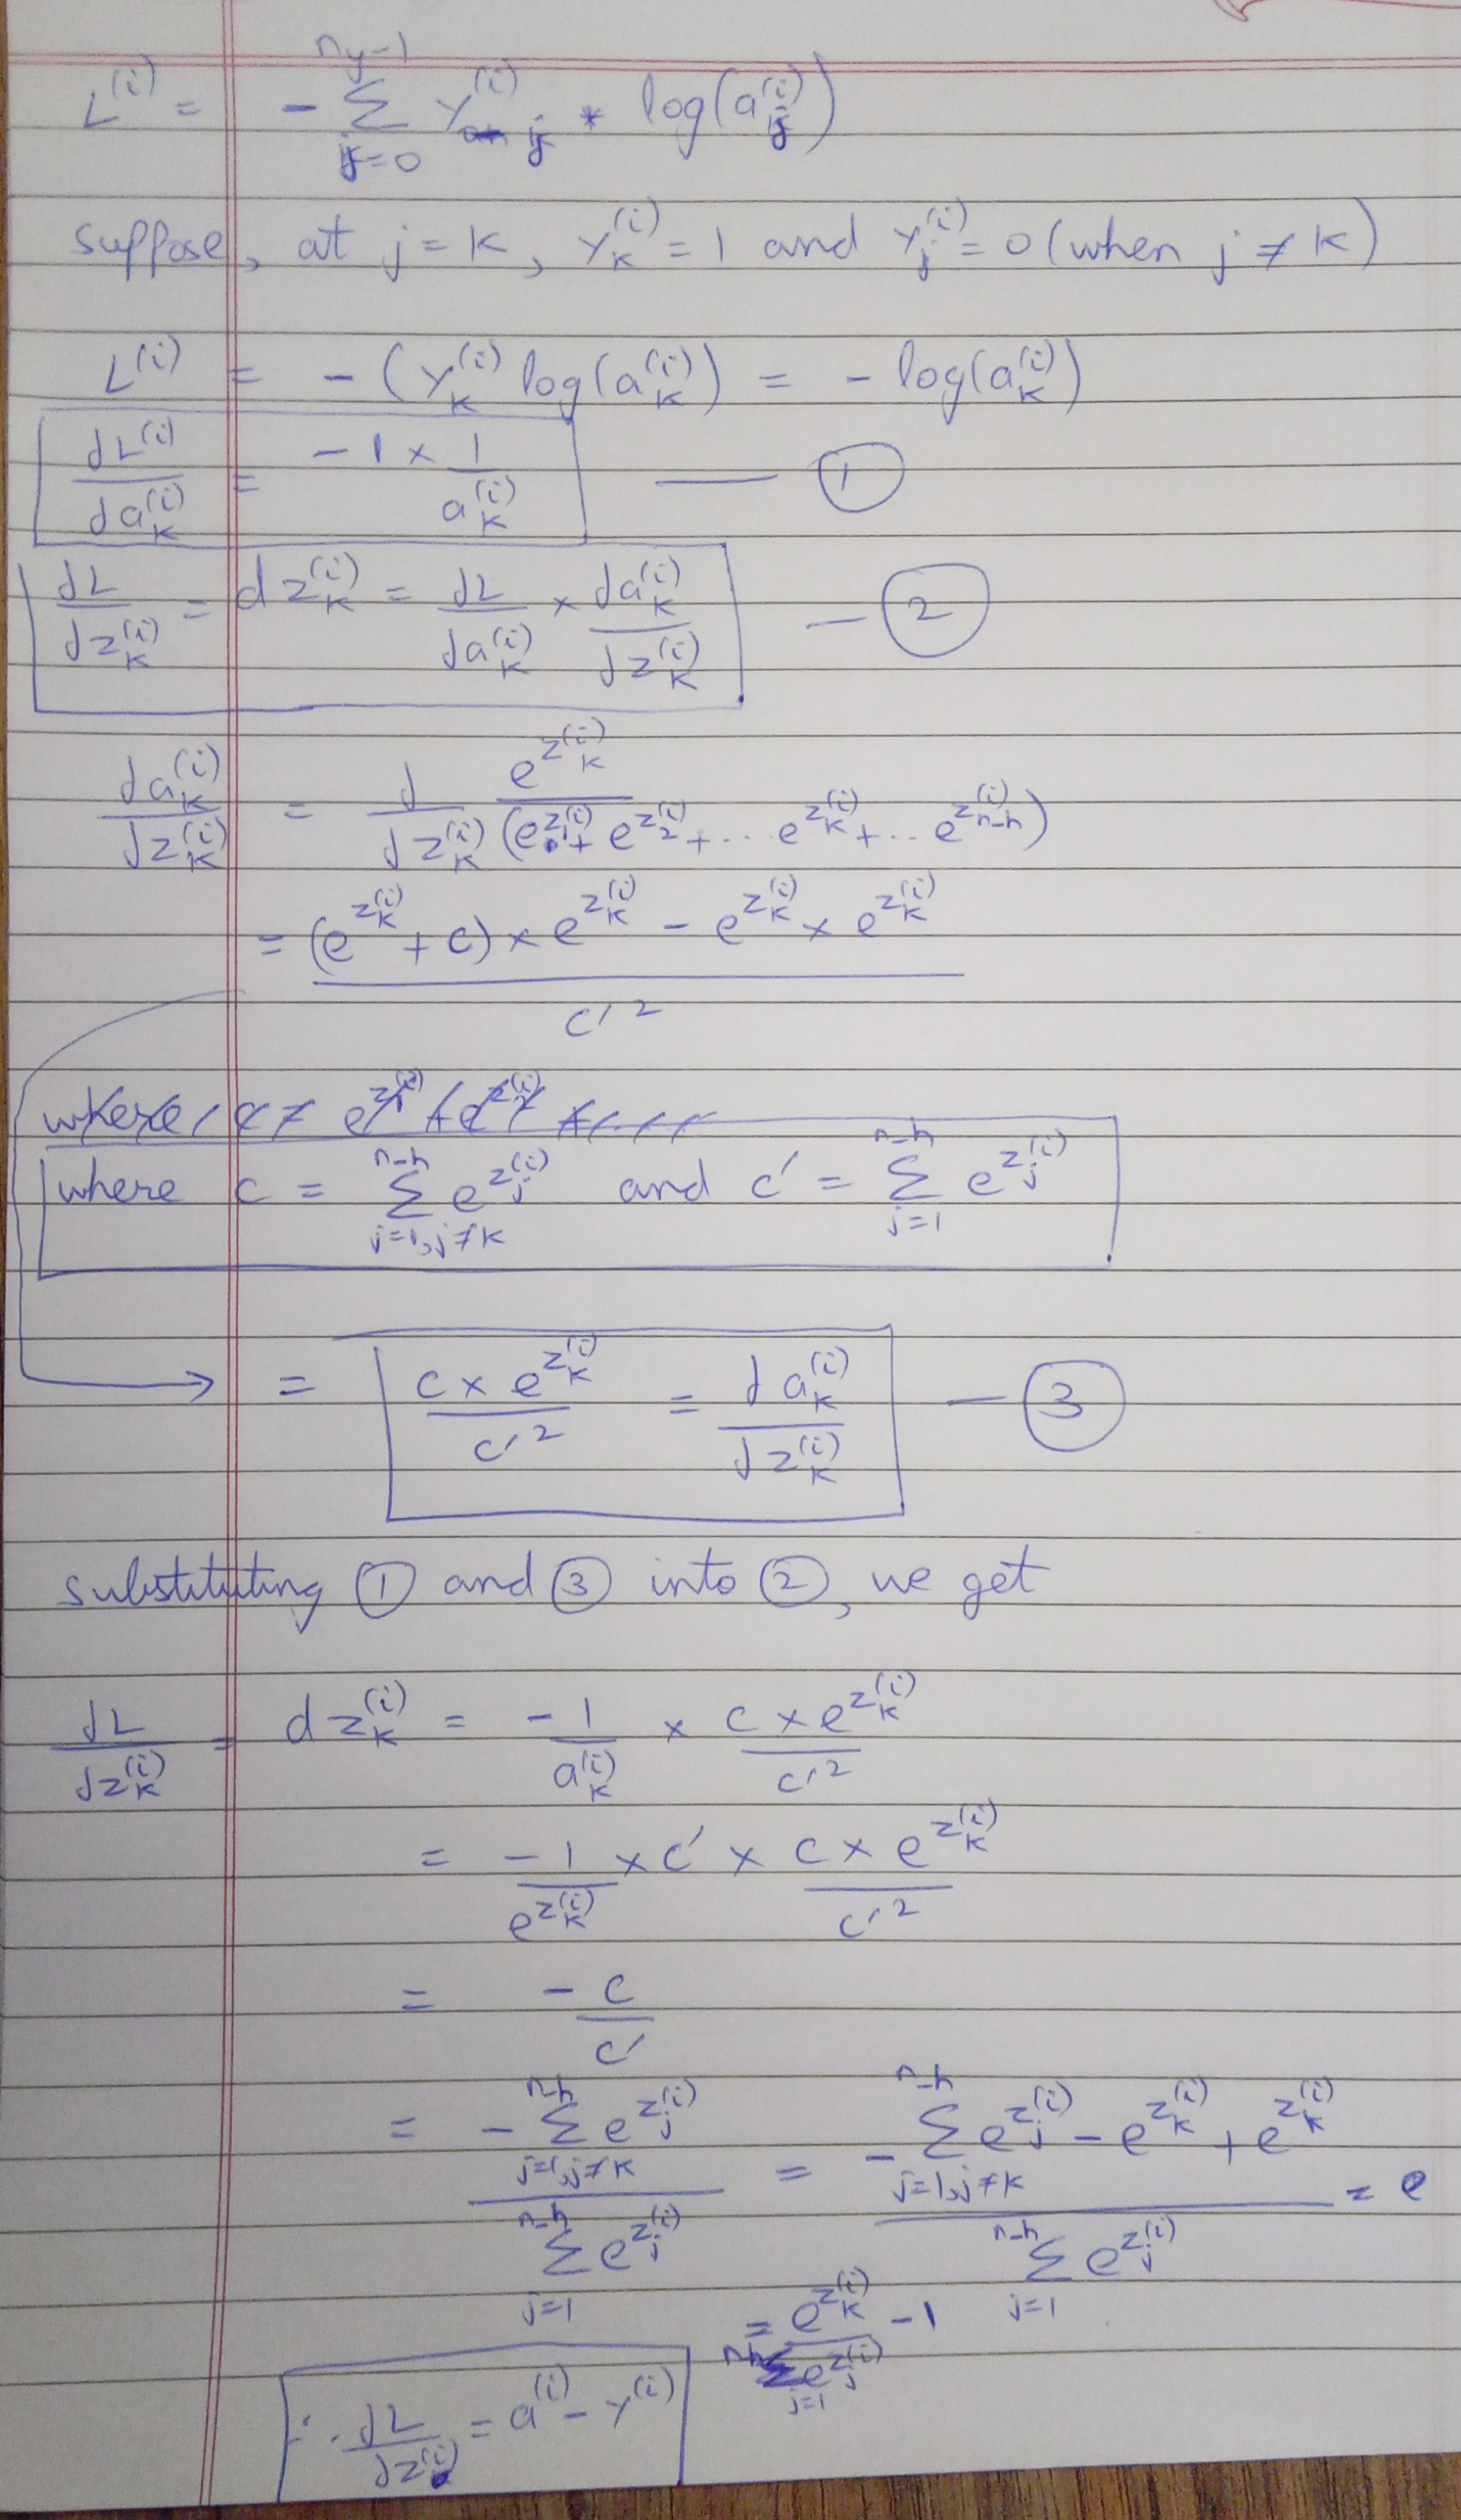

In [58]:
### YOU CANNOT EDIT THIS CELL

# UNIT TEST
def model_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 'a_n': [3, 4], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    # Training set. Sentences composed of a_* words will be of class 0 and sentences composed of c_* words will be of class 1
    X = np.asarray(['a a_s synonym_of_a a_n c_sw', 'a a_s a_n c_sw', 'a_s  a a_n', 'synonym_of_a a a_s a_n c_sw', " a_s a_n",
                    " a a_s a_n c ", " a_n  a c c c_e",
                   'c c_nw c_n c c_ne', 'c_e c c_se c_s', 'c_nw c a_s c_e c_e', 'c_e a_nw c_sw', 'c_sw c c_ne c_ne'])
    
    Y = np.asarray([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    
    np.random.seed(10)
    pred, W, b = model(X, Y, word_to_vec_map, 0.0025, 110)
    
    assert W.shape == (2, 2), "W must be of shape 2 x 2"
    assert np.allclose(pred.transpose(), Y), "Model must give a perfect accuracy"
    assert np.allclose(b[0], -1 * b[1]), "b should be symmetric in this example"
    
    print("\033[92mAll tests passed!")
    
model_test(model)

Epoch: 0 --- cost = 0.051434617517266266
Accuracy: 0.9166666666666666
Epoch: 100 --- cost = 0.012801357015080525
Accuracy: 1.0
All tests passed!


In [59]:
# We run the 'model' function and check for the accuracy

np.random.seed(1)
pred, W, b = model(X_train, Y_train, word_to_vec_map)
# print(pred)

Epoch: 0 --- cost = 1.9349662334795132
Accuracy: 0.3484848484848485
Epoch: 100 --- cost = 0.08329959386446986
Accuracy: 0.8712121212121212
Epoch: 200 --- cost = 0.04769187938442233
Accuracy: 0.8484848484848485
Epoch: 300 --- cost = 0.037225587806593
Accuracy: 0.8409090909090909


In [60]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.8257575757575758
Test set:
Accuracy: 0.75


In [61]:
X_my_sentences = np.array(["i treasure you", "i love you", "funny lol", "lets play with a ball", "food is ready", "today is not good"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.6666666666666666

i treasure you ❤️
i love you 😄
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
today is not good 😄


In [62]:
# Note

# The model predicts the sentence 'today is not good' in a positive tone because we only take the average of the embeddings
# but we don't consider the order/sequence of words in the sentence.

### Emojifier-V2: Using LSTMs in Keras 

In [63]:
# Importing the packages

import numpy as np
import tensorflow
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

In [21]:
for idx, val in enumerate(["I", "like", "learning"]):
    print(idx, val)

0 I
1 like
2 learning


In [64]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: sentences_to_indices

def sentences_to_indices(X, word_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m,)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    # number of training examples
    m = X.shape[0]                                   
    
    # Initializing X_indices as a numpy matrix of zeros with the correct shape (m, max_len)
    X_indices = np.zeros((m, max_len))
    
    # looping over training examples
    for i in range(m):
        
        # Converting the ith training sentence to lower case and spliting it into words.
        sentence_words = X[i].lower().split()
        
        j = 0
        
        # Looping over the words of sentence_words

        for w in sentence_words:
            # if w exists in the word_to_index dictionary
            if w in word_to_index:
                # Setting the (i,j)th entry of X_indices to the index of the correct word.
                X_indices[i, j] = word_to_index[w]
                j = j+1
    
    return X_indices

In [65]:
### YOU CANNOT EDIT THIS CELL

# UNIT TEST
def sentences_to_indices_test(target):
    
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(["i", "like", "learning", "deep", "machine", "love", "smile", '´0.=']):
        word_to_index[val] = idx + 1;
       
    max_len = 4
    sentences = np.array(["I like deep learning", "deep ´0.= love machine", "machine learning smile", "$"]);
    indexes = target(sentences, word_to_index, max_len)
    print(indexes)
    
    assert type(indexes) == np.ndarray, "Wrong type. Use np arrays in the function"
    assert indexes.shape == (sentences.shape[0], max_len), "Wrong shape of ouput matrix"
    assert np.allclose(indexes, [[1, 2, 4, 3],
                                 [4, 8, 6, 5],
                                 [5, 3, 7, 0],
                                 [0, 0, 0, 0]]), "Wrong values. Debug with the given examples"
    
    print("\033[92mAll tests passed!")
    
sentences_to_indices_test(sentences_to_indices)

[[1. 2. 4. 3.]
 [4. 8. 6. 5.]
 [5. 3. 7. 0.]
 [0. 0. 0. 0.]]
All tests passed!


**Expected value**

```
[[1. 2. 4. 3.]
 [4. 8. 6. 5.]
 [5. 3. 7. 0.]
 [0. 0. 0. 0.]]
```

In [66]:
# Example usage of 'sentences_to_indices' function

X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1, word_to_index, max_len=5)
print("X1 =", X1)
print("X1_indices =\n", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices =
 [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [70]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: pretrained_embedding_layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_size = len(word_to_index) + 1              # adding 1 to fit Keras embedding (requirement)
    # vocab_size accounts for all the words in your dictionary plus the additional index for unknown words
    
    # Selecting a random word from the GloVe list of words
    any_word = list(word_to_vec_map.keys())[0] 
    
    # defining dimensionality of your GloVe word vectors (= 50)
    emb_dim = word_to_vec_map[any_word].shape[0]
      
    # Initializing the embedding matrix as a numpy array of zeros.
    emb_matrix = np.zeros((vocab_size, emb_dim))
    
    # Forming the 'emb_matrix'
    # Note - In Keras embedding layer, each row corresponds to a new word in vocabulary. That's how it's structured.
    # Hence we define the 'emb_matrix' in the below manner.
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]

    # Defining Keras embedding layer with the correct input and output sizes
    embedding_layer = Embedding(input_dim = vocab_size, output_dim = emb_dim, trainable = False)
    # We are not training the 'embedding layer' because our dataset is small. Just using the pre-trained GloVe embeddings.
    # So 'trainable' = 'False'

    # Building the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None,))
    # The above line of code is common when we are use pre-trained embeddings. Just to build the layer manually.
    
    # The Embedding layer in Keras is a special type of layer that converts positive integers (word indices) into dense 
    # vectors of fixed size. Essentially, it's a lookup table that maps word indices to their corresponding word embeddings.
    
    # Setting the weights of the embedding layer to the embedding matrix. The layer is now pre-trained
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [71]:
### YOU CANNOT EDIT THIS CELL

# UNIT TEST
def pretrained_embedding_layer_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 'a_n': [3, 4], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(list(word_to_vec_map.keys())):
        word_to_index[val] = idx;
        
    np.random.seed(1)
    embedding_layer = target(word_to_vec_map, word_to_index)
    
    assert type(embedding_layer) == Embedding, "Wrong type"
    assert embedding_layer.input_dim == len(list(word_to_vec_map.keys())) + 1, "Wrong input shape"
    assert embedding_layer.output_dim == len(word_to_vec_map['a']), "Wrong output shape"
    assert np.allclose(embedding_layer.get_weights(), 
                       [[[ 3, 3], [ 3, 3], [ 2, 4], [ 3, 2], [ 3, 4],
                       [-2, 1], [-2, 2], [-1, 2], [-1, 1], [-1, 0],
                       [-2, 0], [-3, 0], [-3, 1], [-3, 2], [ 0, 0]]]), "Wrong vaulues"
    print("\033[92mAll tests passed!")
       
    
pretrained_embedding_layer_test(pretrained_embedding_layer)

All tests passed!


In [72]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][1] =", embedding_layer.get_weights()[0][1][1])
print("Input_dim", embedding_layer.input_dim)
print("Output_dim",embedding_layer.output_dim)

weights[0][1][1] = 0.39031
Input_dim 400001
Output_dim 50


In [73]:
# Note

# The 'embedding matrix' in above case is 2-dimensional.
# embedding_layer.get_weights() gives us the 'embedding matrix' and then we select the [1][1] weight.


<img src="images/emojifier-v2.png" style="width:700px;height:400px;"> <br>
<caption><center><font color='purple'><b>Figure 3</b>: Emojifier-v2. A 2-layer LSTM sequence classifier. </center></caption></font> 




In [74]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: Emojify_V2

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    # Defining the input layer
    sentence_indices = Input(shape=input_shape, dtype='int32')
    # Actually the 'Input' layer is of size (m, max_len) but we don't usually mention m while defining layers in keras
    
    # Creating the embedding layer pretrained with GloVe Vectors
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagating sentence_indices through the embedding layer
    embeddings = embedding_layer(sentence_indices)
    # sentence_indices is of shape (m, max_len)
    # The shape of 'embeddings' is (m, max_len, embed_dim) where embed_dim = 50. Also please check the note below
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # The returned output should be a batch of sequences.
    X = LSTM(units = 128, return_sequences = True)(embeddings)
    # If 'return_sequences' = True, at every time step, there is an output. This is common if we are stacking LSTM layers.
    # If 'return_sequences' = False, we get a single output at the end of the sequence
    
    # Adding dropout with a probability of 0.5
    X = Dropout(rate = 0.5)(X) 
    
    # Propagating X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(units = 128, return_sequences=False)(X)
    
    # Adding dropout with a probability of 0.5
    X = Dropout(rate = 0.5)(X)
    
    # Propagating X through a Dense layer with 5 units
    X = Dense(units = 5)(X)
    
    # Adding a softmax activation
    X = Activation('softmax')(X)
    
    # The final 'X' would have the dimensions of (m,5) as there is no time step dimension.
    
    # Creating Model instance which converts sentence_indices into X.
    model = Model(inputs = sentence_indices, outputs = X)
    
    # We define tensorflow.keras.models.Model which takes 'sentence_indices' (Input layer) and gives 'X' as the output
    
    return model

In [75]:
# In Keras, when dealing with time series data or sequences (such as sentences in natural language processing tasks), 
# the convention is as follows:

# The first dimension is the batch dimension, representing the number of examples in the batch. 
# This is often denoted as m in machine learning literature.

# The second dimension represents the time steps or the sequence length. In the context of text data, 
# this would be the length of the sentences, which is often referred to as max_len (maximum length of the sentences in 
# the batch).

# The third dimension (if applicable) is used for the features of each time step. 
# In the case of an embedding layer for text data, this dimension would represent the embedding vector size.

In [76]:
### YOU CANNOT EDIT THIS CELL

# UNIT TEST
from tensorflow.python.keras.engine.functional import Functional

def Emojify_V2_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 'a_n': [3, 4], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(list(word_to_vec_map.keys())):
        word_to_index[val] = idx;
        
    maxLen = 4
    model = target((maxLen,), word_to_vec_map, word_to_index)
    
    assert type(model) == Functional, "Make sure you have correctly created Model instance which converts \"sentence_indices\" into \"X\""
    
    expectedModel = [['InputLayer', [(None, 4)], 0], ['Embedding', (None, 4, 2), 30], ['LSTM', (None, 4, 128), 67072, (None, 4, 2), 'tanh', True], ['Dropout', (None, 4, 128), 0, 0.5], ['LSTM', (None, 128), 131584, (None, 4, 128), 'tanh', False], ['Dropout', (None, 128), 0, 0.5], ['Dense', (None, 5), 645, 'linear'], ['Activation', (None, 5), 0]]
    comparator(summary(model), expectedModel)
    
    
Emojify_V2_test(Emojify_V2)

All tests passed!


In [79]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 10, 50)            20000050  
_________________________________________________________________
lstm_12 (LSTM)               (None, 10, 128)           91648     
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [80]:
# Defining the 'loss', 'optimizer' and 'metrics'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

# Y_train_oh is of shape (m,5)

In [82]:
print(Y_train_oh.shape)

(132, 5)


In [83]:
# Fitting the model

model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

Epoch 1/50
5/5 [==============================] - 0s 18ms/step - loss: 1.5856 - accuracy: 0.2424
Epoch 2/50
5/5 [==============================] - 0s 26ms/step - loss: 1.5187 - accuracy: 0.3258
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 1.4601 - accuracy: 0.4015
Epoch 4/50
5/5 [==============================] - 0s 23ms/step - loss: 1.3838 - accuracy: 0.4545
Epoch 5/50
5/5 [==============================] - 0s 34ms/step - loss: 1.3248 - accuracy: 0.4848
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 1.2110 - accuracy: 0.5530
Epoch 7/50
5/5 [==============================] - 0s 24ms/step - loss: 1.1021 - accuracy: 0.6212
Epoch 8/50
5/5 [==============================] - 0s 33ms/step - loss: 1.0177 - accuracy: 0.5985
Epoch 9/50
5/5 [==============================] - 0s 23ms/step - loss: 0.8284 - accuracy: 0.7576
Epoch 10/50
5/5 [==============================] - 0s 23ms/step - loss: 0.9171 - accuracy: 0.6591
Epoch 11/50
5/5 [============

In [84]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.8750

Test accuracy =  0.875


In [85]:
# This code allows us to see the mislabelled examples
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)

# model.predict(X_train_indices) returns 'pred' of shape (m,5)
pred = model.predict(X_test_indices)

for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:😞 prediction: work is hard	😄
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:🍴 prediction: any suggestions for dinner	😄
Expected emoji:😄 prediction: you brighten my day	❤️
Expected emoji:😞 prediction: she is a bully	❤️
Expected emoji:😄 prediction: will you be my valentine	❤️
Expected emoji:🍴 prediction: I did not have breakfast 😄


In [87]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
x_test = np.array(['I cannot play'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

# model.predict() returns a (1,5) vector where m = 1
# np.argmax() finds the index where the maximum value is occuring.
# The 'label_to_emoji' converts the 'label' (0,1,2,3,4) to the respective emoji.

I cannot play ⚾


In [89]:
print(label_to_emoji(2))

😄


In [90]:
# Finally we have completed building sentiment classifier using word embeddings

In [ ]:
# Points to Remember

# 1) To use mini-batches, the sequences need to be padded so that all the examples in a mini-batch have the same length.

# 2) But if we train the model on one example at a time (i.e., using a batch size of 1, which is effectively 
# stochastic gradient descent), padding is not necessary because each example is processed independently.

# 3) An Embedding() layer can initialized with pretrained values. These values can be either fixed or trained further on
# our dataset.

# 4) LSTM() has a flag called 'return_sequences' to decide if we would like to return all hidden states or only the last one.

# 5) Dropout() can be used right after LSTM() to regularize the network.